In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 30)

import numpy as np
import json
import pprint
import urllib.request
from collections import Counter

In [2]:
df = pd.read_csv('NBA_Dataset_A4.csv')
df

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,"1,300.00","1,293.28",40.29,NYK,Knicks,68,"1,300.00","1,306.72",H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,"1,300.00","1,306.72",41.71,TRH,Huskies,66,"1,300.00","1,293.28",A,W,0.36,NaN
2,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,"1,306.72","1,297.07",40.69,CHS,Stags,63,"1,300.00","1,309.65",A,L,0.37,NaN
3,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,"1,300.00","1,309.65",42.01,NYK,Knicks,47,"1,306.72","1,297.07",H,W,0.63,NaN
4,3,194611020DTF,NBA,1,1947,11/2/1946,1,0,WSC,Capitols,50,"1,300.00","1,320.38",43.14,DTF,Falcons,33,"1,300.00","1,279.62",A,W,0.36,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,1,2015,6/11/2015,101,1,GSW,Warriors,103,"1,790.96","1,809.98",67.79,CLE,Cavaliers,82,"1,723.41","1,704.39",A,W,0.45,NaN
126310,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,"1,704.39","1,700.74",60.01,GSW,Warriors,104,"1,809.98","1,813.63",A,L,0.23,NaN
126311,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,"1,809.98","1,813.63",68.01,CLE,Cavaliers,91,"1,704.39","1,700.74",H,W,0.77,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,"1,700.74","1,692.09",59.29,GSW,Warriors,105,"1,813.63","1,822.29",H,L,0.48,NaN


In [3]:
#1. Check for logical inconsistencies with respect to the 'pts', 'opp_pts', and 'game_result' columns. In basketball, a team wins if it scores more points than their opponent, and there are no ties allowed.

In [4]:
game_points = ['pts', 'opp_pts', 'game_result']

In [5]:
df[game_points]

,pts,opp_pts,game_result
0,66,68,L
1,68,66,W
2,47,63,L
3,63,47,W
4,50,33,W
...,...,...,...
126309,103,82,W
126310,91,104,L
126311,104,91,W
126312,97,105,L


In [6]:
def f(row):
    if row['pts'] - row['opp_pts'] < 0:
        val = 'L'
    else:
        val = 'W'
    return val

In [7]:
df['game_result_verification'] = df[game_points].apply(f, axis=1)

In [8]:
df

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,game_result_verification
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,"1,300.00","1,293.28",40.29,NYK,Knicks,68,"1,300.00","1,306.72",H,L,0.64,NaN,L
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,"1,300.00","1,306.72",41.71,TRH,Huskies,66,"1,300.00","1,293.28",A,W,0.36,NaN,W
2,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,"1,306.72","1,297.07",40.69,CHS,Stags,63,"1,300.00","1,309.65",A,L,0.37,NaN,L
3,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,"1,300.00","1,309.65",42.01,NYK,Knicks,47,"1,306.72","1,297.07",H,W,0.63,NaN,W
4,3,194611020DTF,NBA,1,1947,11/2/1946,1,0,WSC,Capitols,50,"1,300.00","1,320.38",43.14,DTF,Falcons,33,"1,300.00","1,279.62",A,W,0.36,NaN,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,1,2015,6/11/2015,101,1,GSW,Warriors,103,"1,790.96","1,809.98",67.79,CLE,Cavaliers,82,"1,723.41","1,704.39",A,W,0.45,NaN,W
126310,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,"1,704.39","1,700.74",60.01,GSW,Warriors,104,"1,809.98","1,813.63",A,L,0.23,NaN,L
126311,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,"1,809.98","1,813.63",68.01,CLE,Cavaliers,91,"1,704.39","1,700.74",H,W,0.77,NaN,W
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,"1,700.74","1,692.09",59.29,GSW,Warriors,105,"1,813.63","1,822.29",H,L,0.48,NaN,L


In [9]:
def v(row):
    if row['game_result'] == row['game_result_verification']:
        val = 'Verified'
    else:
        val = 'Not Verified'
    return val

In [10]:
df['game_result_verification_result'] = df.apply(v, axis=1)

In [11]:
df

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,game_result_verification,game_result_verification_result
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,"1,300.00","1,293.28",40.29,NYK,Knicks,68,"1,300.00","1,306.72",H,L,0.64,NaN,L,Verified
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,"1,300.00","1,306.72",41.71,TRH,Huskies,66,"1,300.00","1,293.28",A,W,0.36,NaN,W,Verified
2,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,"1,306.72","1,297.07",40.69,CHS,Stags,63,"1,300.00","1,309.65",A,L,0.37,NaN,L,Verified
3,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,"1,300.00","1,309.65",42.01,NYK,Knicks,47,"1,306.72","1,297.07",H,W,0.63,NaN,W,Verified
4,3,194611020DTF,NBA,1,1947,11/2/1946,1,0,WSC,Capitols,50,"1,300.00","1,320.38",43.14,DTF,Falcons,33,"1,300.00","1,279.62",A,W,0.36,NaN,W,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,1,2015,6/11/2015,101,1,GSW,Warriors,103,"1,790.96","1,809.98",67.79,CLE,Cavaliers,82,"1,723.41","1,704.39",A,W,0.45,NaN,W,Verified
126310,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,"1,704.39","1,700.74",60.01,GSW,Warriors,104,"1,809.98","1,813.63",A,L,0.23,NaN,L,Verified
126311,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,"1,809.98","1,813.63",68.01,CLE,Cavaliers,91,"1,704.39","1,700.74",H,W,0.77,NaN,W,Verified
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,"1,700.74","1,692.09",59.29,GSW,Warriors,105,"1,813.63","1,822.29",H,L,0.48,NaN,L,Verified


In [12]:
df['game_result_verification_result'].value_counts(ascending=True)

Not Verified        16
Verified        126298
Name: game_result_verification_result, dtype: int64

In [13]:
df_nv = df.loc[(df.game_result_verification_result=='Not Verified')]

In [14]:
df_nv

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,game_result_verification,game_result_verification_result
22,12,194611070STB,NBA,0,1947,11/7/1946,3,0,STB,Bombers,69,"1,312.85","1,302.60",41.27,NYK,Knicks,68,"1,297.07","1,307.32",H,L,0.66,NaN,W,Not Verified
23,12,194611070STB,NBA,1,1947,11/7/1946,3,0,NYK,Knicks,68,"1,297.07","1,307.32",41.77,STB,Bombers,69,"1,312.85","1,302.60",A,W,0.34,NaN,L,Not Verified
51979,25990,198411270SAS,NBA,0,1985,11/27/1984,15,0,SAS,Spurs,97,"1,451.63","1,432.19",33.76,HOU,Rockets,114,"1,467.39","1,486.83",H,W,0.62,NaN,L,Not Verified
52021,26011,198411300UTA,NBA,1,1985,11/30/1984,15,0,DEN,Nuggets,97,"1,589.33","1,573.28",48.40,UTA,Jazz,116,"1,485.11","1,501.17",A,W,0.51,NaN,L,Not Verified
52094,26048,198412070SEA,NBA,1,1985,12/7/1984,20,0,SAS,Spurs,117,"1,453.88","1,462.22",36.85,SEA,Thunder,114,"1,477.95","1,469.61",A,L,0.33,NaN,W,Not Verified
52222,26112,198412190BOS,NBA,1,1985,12/19/1984,28,0,MIL,Bucks,107,"1,583.57","1,610.14",52.07,BOS,Celtics,107,"1,722.45","1,695.88",A,L,0.20,NaN,W,Not Verified
52223,26112,198412190BOS,NBA,0,1985,12/19/1984,26,0,BOS,Celtics,107,"1,722.45","1,695.88",59.82,MIL,Bucks,107,"1,583.57","1,610.14",H,L,0.80,NaN,W,Not Verified
87000,43501,200003110ATL,NBA,1,2000,3/11/2000,63,0,VAN,Grizzlies,86,"1,358.80","1,355.10",26.54,ATL,Hawks,91,"1,410.82","1,414.51",A,W,0.29,NaN,L,Not Verified
87001,43501,200003110ATL,NBA,0,2000,3/11/2000,61,0,ATL,Hawks,91,"1,410.82","1,414.51",32.26,VAN,Grizzlies,86,"1,358.80","1,355.10",H,L,0.71,NaN,W,Not Verified
87218,43610,200003260HOU,NBA,1,2000,3/26/2000,69,0,CHI,Bulls,78,"1,280.93","1,270.43",19.42,HOU,Rockets,123,"1,410.58","1,421.08",A,W,0.21,NaN,L,Not Verified


In [15]:
df_v = pd.concat([df, df_nv]).drop_duplicates(keep=False)

In [16]:
df_v

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,game_result_verification,game_result_verification_result
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,"1,300.00","1,293.28",40.29,NYK,Knicks,68,"1,300.00","1,306.72",H,L,0.64,NaN,L,Verified
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,"1,300.00","1,306.72",41.71,TRH,Huskies,66,"1,300.00","1,293.28",A,W,0.36,NaN,W,Verified
2,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,"1,306.72","1,297.07",40.69,CHS,Stags,63,"1,300.00","1,309.65",A,L,0.37,NaN,L,Verified
3,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,"1,300.00","1,309.65",42.01,NYK,Knicks,47,"1,306.72","1,297.07",H,W,0.63,NaN,W,Verified
4,3,194611020DTF,NBA,1,1947,11/2/1946,1,0,WSC,Capitols,50,"1,300.00","1,320.38",43.14,DTF,Falcons,33,"1,300.00","1,279.62",A,W,0.36,NaN,W,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,1,2015,6/11/2015,101,1,GSW,Warriors,103,"1,790.96","1,809.98",67.79,CLE,Cavaliers,82,"1,723.41","1,704.39",A,W,0.45,NaN,W,Verified
126310,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,"1,704.39","1,700.74",60.01,GSW,Warriors,104,"1,809.98","1,813.63",A,L,0.23,NaN,L,Verified
126311,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,"1,809.98","1,813.63",68.01,CLE,Cavaliers,91,"1,704.39","1,700.74",H,W,0.77,NaN,W,Verified
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,"1,700.74","1,692.09",59.29,GSW,Warriors,105,"1,813.63","1,822.29",H,L,0.48,NaN,L,Verified


In [17]:
#2. Show all teams with large changes in their 'elo_i' ratings from 2014 to 2015.

In [18]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126298 entries, 0 to 126313
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   gameorder                        126298 non-null  int64  
 1   game_id                          126298 non-null  object 
 2   lg_id                            126298 non-null  object 
 3   _iscopy                          126298 non-null  int64  
 4   year_id                          126298 non-null  int64  
 5   date_game                        126298 non-null  object 
 6   seasongame                       126298 non-null  int64  
 7   is_playoffs                      126298 non-null  int64  
 8   team_id                          126298 non-null  object 
 9   fran_id                          126298 non-null  object 
 10  pts                              126298 non-null  int64  
 11  elo_i                            126298 non-null  float64
 12  el

In [19]:
df_2014 = df_v.loc[(df_v.year_id==2014)]

In [20]:
df_2014

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,game_result_verification,game_result_verification_result
121054,60528,201310290IND,NBA,1,2014,10/29/2013,1,0,ORL,Magic,87,"1,313.23","1,311.53",22.27,IND,Pacers,97,"1,583.57","1,585.27",A,L,0.11,NaN,L,Verified
121055,60528,201310290IND,NBA,0,2014,10/29/2013,1,0,IND,Pacers,97,"1,583.57","1,585.27",49.37,ORL,Magic,87,"1,313.23","1,311.53",H,W,0.89,NaN,W,Verified
121056,60529,201310290LAL,NBA,1,2014,10/29/2013,1,0,LAC,Clippers,103,"1,586.59","1,575.41",48.37,LAL,Lakers,116,"1,511.02","1,522.19",A,L,0.46,NaN,L,Verified
121057,60529,201310290LAL,NBA,0,2014,10/29/2013,1,0,LAL,Lakers,116,"1,511.02","1,522.19",42.87,LAC,Clippers,103,"1,586.59","1,575.41",H,W,0.54,NaN,W,Verified
121058,60530,201310290MIA,NBA,1,2014,10/29/2013,1,0,CHI,Bulls,95,"1,519.91","1,516.61",42.28,MIA,Heat,107,"1,691.89","1,695.19",A,L,0.17,NaN,L,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123687,61844,201406100MIA,NBA,1,2014,6/10/2014,103,1,SAS,Spurs,111,"1,727.29","1,743.92",63.39,MIA,Heat,92,"1,641.21","1,624.59",A,W,0.48,NaN,W,Verified
123688,61845,201406120MIA,NBA,0,2014,6/12/2014,101,1,MIA,Heat,86,"1,624.59","1,608.82",51.70,SAS,Spurs,107,"1,743.92","1,759.68",H,L,0.47,NaN,L,Verified
123689,61845,201406120MIA,NBA,1,2014,6/12/2014,104,1,SAS,Spurs,107,"1,743.92","1,759.68",64.53,MIA,Heat,86,"1,624.59","1,608.82",A,W,0.53,NaN,W,Verified
123690,61846,201406150SAS,NBA,1,2014,6/15/2014,102,1,MIA,Heat,87,"1,608.82","1,604.17",51.24,SAS,Spurs,104,"1,759.68","1,764.34",A,L,0.19,NaN,L,Verified


In [21]:
df_2015 = df_v.loc[(df_v.year_id==2015)]

In [22]:
df_2015

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,game_result_verification,game_result_verification_result
123692,61847,201410280LAL,NBA,0,2015,10/28/2014,1,0,LAL,Lakers,90,"1,422.00","1,410.66",31.34,HOU,Rockets,108,"1,596.46","1,607.80",H,L,0.39,NaN,L,Verified
123693,61847,201410280LAL,NBA,1,2015,10/28/2014,1,0,HOU,Rockets,108,"1,596.46","1,607.80",51.59,LAL,Lakers,90,"1,422.00","1,410.66",A,W,0.61,NaN,W,Verified
123694,61848,201410280NOP,NBA,1,2015,10/28/2014,1,0,ORL,Magic,84,"1,359.43","1,353.29",25.88,NOP,Pelicans,101,"1,457.22","1,463.35",A,L,0.24,NaN,L,Verified
123695,61848,201410280NOP,NBA,0,2015,10/28/2014,1,0,NOP,Pelicans,101,"1,457.22","1,463.35",36.70,ORL,Magic,84,"1,359.43","1,353.29",H,W,0.76,NaN,W,Verified
123696,61849,201410280SAS,NBA,1,2015,10/28/2014,1,0,DAL,Mavericks,100,"1,592.01","1,590.40",49.86,SAS,Spurs,101,"1,699.50","1,701.11",A,L,0.23,NaN,L,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,1,2015,6/11/2015,101,1,GSW,Warriors,103,"1,790.96","1,809.98",67.79,CLE,Cavaliers,82,"1,723.41","1,704.39",A,W,0.45,NaN,W,Verified
126310,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,"1,704.39","1,700.74",60.01,GSW,Warriors,104,"1,809.98","1,813.63",A,L,0.23,NaN,L,Verified
126311,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,"1,809.98","1,813.63",68.01,CLE,Cavaliers,91,"1,704.39","1,700.74",H,W,0.77,NaN,W,Verified
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,"1,700.74","1,692.09",59.29,GSW,Warriors,105,"1,813.63","1,822.29",H,L,0.48,NaN,L,Verified


In [23]:
rating_changes = ['year_id', 'date_game', 'seasongame', 'team_id', 'elo_i']

In [24]:
df2014 = df_2014[rating_changes]
df2014

,year_id,date_game,seasongame,team_id,elo_i
121054,2014,10/29/2013,1,ORL,"1,313.23"
121055,2014,10/29/2013,1,IND,"1,583.57"
121056,2014,10/29/2013,1,LAC,"1,586.59"
121057,2014,10/29/2013,1,LAL,"1,511.02"
121058,2014,10/29/2013,1,CHI,"1,519.91"
...,...,...,...,...,...
123687,2014,6/10/2014,103,SAS,"1,727.29"
123688,2014,6/12/2014,101,MIA,"1,624.59"
123689,2014,6/12/2014,104,SAS,"1,743.92"
123690,2014,6/15/2014,102,MIA,"1,608.82"


In [25]:
df2014['team_id'].value_counts(ascending=True)

LAL     82
PHI     82
BOS     82
ORL     82
UTA     82
NYK     82
NOP     82
SAC     82
DEN     82
CLE     82
MIL     82
DET     82
MIN     82
PHO     82
CHA     86
CHI     87
HOU     88
TOR     89
DAL     89
GSW     89
ATL     89
MEM     89
POR     93
WAS     93
BRK     94
LAC     95
IND    101
OKC    101
MIA    102
SAS    105
Name: team_id, dtype: int64

In [26]:
df2014max = df2014.groupby(['team_id'])['elo_i'].max()

In [27]:
df2014max

team_id
ATL   1,531.19
BOS   1,502.07
BRK   1,580.35
CHA   1,549.17
CHI   1,608.90
CLE   1,468.44
DAL   1,639.36
DEN   1,634.86
DET   1,477.78
GSW   1,649.49
HOU   1,676.47
IND   1,697.23
LAC   1,715.38
LAL   1,522.19
MEM   1,632.34
MIA   1,716.73
MIL   1,455.78
MIN   1,588.32
NOP   1,489.57
NYK   1,582.13
OKC   1,749.16
ORL   1,374.54
PHI   1,484.97
PHO   1,589.11
POR   1,632.39
SAC   1,446.60
SAS   1,759.68
TOR   1,604.15
UTA   1,521.24
WAS   1,588.25
Name: elo_i, dtype: float64

In [28]:
df2014min = df2014.groupby(['team_id'])['elo_i'].min()

In [29]:
df2014min

team_id
ATL   1,417.17
BOS   1,324.33
BRK   1,412.71
CHA   1,346.32
CHI   1,461.30
CLE   1,330.83
DAL   1,520.07
DEN   1,408.34
DET   1,347.14
GSW   1,561.67
HOU   1,552.73
IND   1,510.23
LAC   1,575.41
LAL   1,338.61
MEM   1,474.55
MIA   1,580.67
MIL   1,256.87
MIN   1,471.49
NOP   1,402.79
NYK   1,406.48
OKC   1,624.45
ORL   1,300.49
PHI   1,174.70
PHO   1,390.56
POR   1,420.18
SAC   1,382.61
SAS   1,636.56
TOR   1,462.16
UTA   1,311.39
WAS   1,439.55
Name: elo_i, dtype: float64

In [30]:
df2015 = df_2015[rating_changes]
df2015

,year_id,date_game,seasongame,team_id,elo_i
123692,2015,10/28/2014,1,LAL,"1,422.00"
123693,2015,10/28/2014,1,HOU,"1,596.46"
123694,2015,10/28/2014,1,ORL,"1,359.43"
123695,2015,10/28/2014,1,NOP,"1,457.22"
123696,2015,10/28/2014,1,DAL,"1,592.01"
...,...,...,...,...,...
126309,2015,6/11/2015,101,GSW,"1,790.96"
126310,2015,6/14/2015,101,CLE,"1,704.39"
126311,2015,6/14/2015,102,GSW,"1,809.98"
126312,2015,6/16/2015,102,CLE,"1,700.74"


In [31]:
df2015['team_id'].value_counts(ascending=True)

LAL     82
PHI     82
ORL     82
CHO     82
UTA     82
IND     82
NYK     82
SAC     82
DEN     82
DET     82
MIN     82
OKC     82
PHO     82
MIA     82
BOS     86
NOP     86
TOR     86
DAL     87
POR     87
MIL     88
BRK     88
SAS     89
WAS     92
MEM     93
CHI     94
LAC     96
ATL     98
HOU     99
CLE    102
GSW    103
Name: team_id, dtype: int64

In [32]:
df2015max = df2015.groupby(['team_id'])['elo_i'].max()

In [33]:
df2015max

team_id
ATL   1,701.18
BOS   1,551.86
BRK   1,534.89
CHI   1,636.09
CHO   1,512.68
CLE   1,723.41
DAL   1,653.70
DEN   1,510.81
DET   1,475.55
GSW   1,813.63
HOU   1,669.54
IND   1,535.26
LAC   1,743.11
LAL   1,422.00
MEM   1,678.42
MIA   1,596.98
MIL   1,550.35
MIN   1,520.76
NOP   1,539.77
NYK   1,534.44
OKC   1,630.58
ORL   1,396.20
PHI   1,330.19
PHO   1,592.71
POR   1,667.73
SAC   1,512.10
SAS   1,743.34
TOR   1,634.73
UTA   1,565.02
WAS   1,585.07
Name: elo_i, dtype: float64

In [34]:
df2015min = df2015.groupby(['team_id'])['elo_i'].min()

In [35]:
df2015min

team_id
ATL   1,485.85
BOS   1,374.37
BRK   1,421.72
CHI   1,525.32
CHO   1,388.68
CLE   1,431.63
DAL   1,549.15
DEN   1,353.34
DET   1,292.57
GSW   1,590.80
HOU   1,589.34
IND   1,435.04
LAC   1,591.84
LAL   1,301.39
MEM   1,567.76
MIA   1,433.57
MIL   1,316.63
MIN   1,271.75
NOP   1,452.31
NYK   1,242.41
OKC   1,508.26
ORL   1,285.84
PHI   1,235.21
PHO   1,473.38
POR   1,553.73
SAC   1,372.62
SAS   1,609.70
TOR   1,513.46
UTA   1,347.62
WAS   1,456.83
Name: elo_i, dtype: float64

In [36]:
dfmaxmin = df2014max - df2015min
dfmaxmin.sort_values(ascending=False)

team_id
NYK   339.73
MIN   316.57
MIA   283.16
DEN   281.52
IND   262.19
PHI   249.76
OKC   240.91
LAL   220.80
DET   185.21
UTA   173.62
BRK   158.64
SAS   149.98
MIL   139.15
WAS   131.43
BOS   127.70
LAC   123.54
PHO   115.73
TOR    90.70
DAL    90.22
ORL    88.69
HOU    87.13
CHI    83.58
POR    78.66
SAC    73.98
MEM    64.58
GSW    58.69
ATL    45.34
NOP    37.26
CLE    36.81
CHA      NaN
CHO      NaN
Name: elo_i, dtype: float64

In [37]:
dfminmax = df2015max - df2014min
dfminmax.sort_values(ascending=False)

team_id
CLE   392.58
MIL   293.47
ATL   284.02
UTA   253.63
GSW   251.96
POR   247.55
BOS   227.53
MEM   203.87
PHO   202.15
CHI   174.80
TOR   172.57
LAC   167.70
PHI   155.49
WAS   145.52
NOP   136.98
DAL   133.64
SAC   129.49
DET   128.41
NYK   127.96
BRK   122.18
HOU   116.81
SAS   106.79
DEN   102.47
ORL    95.71
LAL    83.39
MIN    49.28
IND    25.04
MIA    16.30
OKC     6.13
CHA      NaN
CHO      NaN
Name: elo_i, dtype: float64

In [38]:
#3. Find any potential outlier teams that have won a large number of away games.

In [39]:
df_v

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,game_result_verification,game_result_verification_result
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,"1,300.00","1,293.28",40.29,NYK,Knicks,68,"1,300.00","1,306.72",H,L,0.64,NaN,L,Verified
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,"1,300.00","1,306.72",41.71,TRH,Huskies,66,"1,300.00","1,293.28",A,W,0.36,NaN,W,Verified
2,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,"1,306.72","1,297.07",40.69,CHS,Stags,63,"1,300.00","1,309.65",A,L,0.37,NaN,L,Verified
3,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,"1,300.00","1,309.65",42.01,NYK,Knicks,47,"1,306.72","1,297.07",H,W,0.63,NaN,W,Verified
4,3,194611020DTF,NBA,1,1947,11/2/1946,1,0,WSC,Capitols,50,"1,300.00","1,320.38",43.14,DTF,Falcons,33,"1,300.00","1,279.62",A,W,0.36,NaN,W,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,1,2015,6/11/2015,101,1,GSW,Warriors,103,"1,790.96","1,809.98",67.79,CLE,Cavaliers,82,"1,723.41","1,704.39",A,W,0.45,NaN,W,Verified
126310,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,"1,704.39","1,700.74",60.01,GSW,Warriors,104,"1,809.98","1,813.63",A,L,0.23,NaN,L,Verified
126311,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,"1,809.98","1,813.63",68.01,CLE,Cavaliers,91,"1,704.39","1,700.74",H,W,0.77,NaN,W,Verified
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,"1,700.74","1,692.09",59.29,GSW,Warriors,105,"1,813.63","1,822.29",H,L,0.48,NaN,L,Verified


In [40]:
find_potential_outlier = ['year_id', 'date_game', 'team_id', 'game_location', 'game_result']

In [41]:
df_fpo = df_v[find_potential_outlier]

In [42]:
df_fpo

,year_id,date_game,team_id,game_location,game_result
0,1947,11/1/1946,TRH,H,L
1,1947,11/1/1946,NYK,A,W
2,1947,11/2/1946,NYK,A,L
3,1947,11/2/1946,CHS,H,W
4,1947,11/2/1946,WSC,A,W
...,...,...,...,...,...
126309,2015,6/11/2015,GSW,A,W
126310,2015,6/14/2015,CLE,A,L
126311,2015,6/14/2015,GSW,H,W
126312,2015,6/16/2015,CLE,H,L


In [43]:
df_fpo_woag = df_fpo.loc[(df_fpo.game_location=='A') & (df_fpo.game_result=='W')]

In [44]:
df_fpo_woag

,year_id,date_game,team_id,game_location,game_result
1,1947,11/1/1946,NYK,A,W
4,1947,11/2/1946,WSC,A,W
12,1947,11/4/1946,WSC,A,W
15,1947,11/5/1946,CHS,A,W
16,1947,11/5/1946,STB,A,W
...,...,...,...,...,...
126290,2015,5/22/2015,CLE,A,W
126293,2015,5/23/2015,GSW,A,W
126304,2015,6/7/2015,CLE,A,W
126309,2015,6/11/2015,GSW,A,W


In [45]:
df_fpo_woag['team_id'].value_counts(ascending=True)

DNN       2
SDS       2
CHP       3
CHZ       3
WAT       3
       ... 
DET     924
PHI     957
NYK    1131
LAL    1272
BOS    1356
Name: team_id, Length: 104, dtype: int64

In [46]:
df_w = df_v.loc[(df_v.team_id=='BOS') | (df_v.team_id=='LAL') | (df_v.team_id=='NYK')]

In [47]:
df_w

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,game_result_verification,game_result_verification_result
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,"1,300.00","1,306.72",41.71,TRH,Huskies,66,"1,300.00","1,293.28",A,W,0.36,NaN,W,Verified
2,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,"1,306.72","1,297.07",40.69,CHS,Stags,63,"1,300.00","1,309.65",A,L,0.37,NaN,L,Verified
6,4,194611020PRO,NBA,1,1947,11/2/1946,1,0,BOS,Celtics,53,"1,300.00","1,294.85",40.46,PRO,Steamrollers,59,"1,300.00","1,305.15",A,L,0.36,NaN,L,Verified
14,8,194611050BOS,NBA,0,1947,11/5/1946,2,0,BOS,Celtics,55,"1,294.85","1,288.41",39.79,CHS,Stags,57,"1,309.65","1,316.08",H,L,0.62,NaN,L,Verified
28,15,194611090DTF,NBA,1,1947,11/9/1946,3,0,BOS,Celtics,46,"1,288.41","1,275.28",38.41,DTF,Falcons,69,"1,268.45","1,281.58",A,L,0.39,NaN,L,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126146,63074,201504150NYK,NBA,0,2015,4/15/2015,82,0,NYK,Knicks,90,"1,268.42","1,255.68",17.93,DET,Pistons,112,"1,448.34","1,461.08",H,L,0.39,NaN,L,Verified
126163,63082,201504190CLE,NBA,1,2015,4/19/2015,83,1,BOS,Celtics,100,"1,551.86","1,546.22",45.36,CLE,Cavaliers,113,"1,630.62","1,636.26",A,L,0.26,NaN,L,Verified
126173,63087,201504210CLE,NBA,1,2015,4/21/2015,84,1,BOS,Celtics,91,"1,546.22","1,542.26",44.94,CLE,Cavaliers,99,"1,636.26","1,640.22",A,L,0.25,NaN,L,Verified
126185,63093,201504230BOS,NBA,0,2015,4/23/2015,85,1,BOS,Celtics,95,"1,542.26","1,533.12",43.99,CLE,Cavaliers,103,"1,640.22","1,649.37",H,L,0.50,NaN,L,Verified


In [48]:
columns_numbers = ['pts', 'elo_i', 'elo_n', 'win_equiv', 'opp_pts', 'opp_elo_i']

In [49]:
df_wn = df_w[columns_numbers]
df_wn

,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i
1,68,"1,300.00","1,306.72",41.71,66,"1,300.00"
2,47,"1,306.72","1,297.07",40.69,63,"1,300.00"
6,53,"1,300.00","1,294.85",40.46,59,"1,300.00"
14,55,"1,294.85","1,288.41",39.79,57,"1,309.65"
28,46,"1,288.41","1,275.28",38.41,69,"1,268.45"
...,...,...,...,...,...,...
126146,90,"1,268.42","1,255.68",17.93,112,"1,448.34"
126163,100,"1,551.86","1,546.22",45.36,113,"1,630.62"
126173,91,"1,546.22","1,542.26",44.94,99,"1,636.26"
126185,95,"1,542.26","1,533.12",43.99,103,"1,640.22"


In [50]:
def getOutliers():
    dfOut = pd.DataFrame(columns=df_wn.columns, data=None)
    
    for col in df_wn.columns[1:]:
        thirdQ = df_wn[col].quantile(0.75)
        firstQ = df_wn[col].quantile(0.25)
        outlierRange = 1.5*(thirdQ - firstQ)
        lowOutlier = firstQ - outlierRange
        highOutlier = thirdQ + outlierRange
        
        df = df_wn.loc[(df_wn[col] > highOutlier) | (df_wn[col] < lowOutlier)]
        
        df = df.assign(varname = col, threshlow = lowOutlier, threshhigh = highOutlier)
        
        dfOut = pd.concat([dfOut, df])
    
    return dfOut

In [51]:
outliers = getOutliers()

In [52]:
outliers

,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,varname,threshlow,threshhigh
102,54,"1,234.66","1,228.79",33.61,66,"1,294.76",elo_i,"1,235.68","1,862.10"
112,59,"1,228.79","1,233.79",34.12,55,"1,268.64",elo_i,"1,235.68","1,862.10"
130,56,"1,233.79","1,228.68",33.60,66,"1,299.06",elo_i,"1,235.68","1,862.10"
134,46,"1,228.68","1,236.03",34.35,44,"1,259.73",elo_i,"1,235.68","1,862.10"
152,65,"1,229.31","1,210.95",31.82,90,"1,340.92",elo_i,"1,235.68","1,862.10"
...,...,...,...,...,...,...,...,...,...
118064,94,"1,613.85","1,616.31",52.48,82,"1,188.05",opp_elo_i,"1,199.70","1,803.20"
118237,104,"1,567.84","1,571.57",48.03,84,"1,155.44",opp_elo_i,"1,199.70","1,803.20"
122944,123,"1,456.78","1,458.93",36.25,110,"1,198.80",opp_elo_i,"1,199.70","1,803.20"
123104,93,"1,492.77","1,494.33",39.95,92,"1,178.42",opp_elo_i,"1,199.70","1,803.20"


In [53]:
outliers.varname.value_counts()

opp_pts      229
opp_elo_i     50
elo_n         43
elo_i         43
Name: varname, dtype: int64

In [54]:
#4. Fit a linear regression model for 'pts' (points scored) with respect to the 'elo_i'  and 'elo_n' ratings. Identify teams with an outsized influence  on the model. Plot your data.

In [55]:
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

In [56]:
import seaborn as sns

[Text(0.5, 0, 'elo_i'), Text(0, 0.5, 'pts'), Text(0.5, 1.0, 'elo_i by pts')]

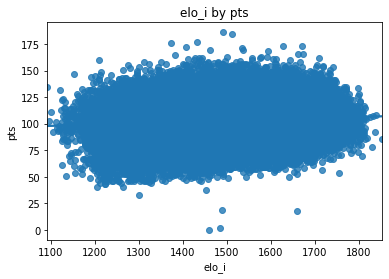

In [57]:
myPlotData = sns.regplot(x='elo_i', y='pts', data=df_v)
myPlotData.set(xlabel="elo_i", ylabel="pts", title="elo_i by pts")

In [58]:
df_v.loc[(df_v.elo_i>1450) & (df_v.pts<25)]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,game_result_verification,game_result_verification_result
3190,1596,195011220LAL,NBA,0,1951,11/22/1950,10,0,MNL,Lakers,18,"1,659.49","1,650.96",56.18,FTW,Pistons,19,"1,487.95","1,496.49",H,L,0.83,NaN,L,Verified
3191,1596,195011220LAL,NBA,1,1951,11/22/1950,12,0,FTW,Pistons,19,"1,487.95","1,496.49",40.74,MNL,Lakers,18,"1,659.49","1,650.96",A,W,0.17,NaN,W,Verified
26684,13343,197210260VIR,ABA,1,1973,10/26/1972,7,0,DNR,Nuggets,0,"1,460.34","1,457.45",40.41,VIR,Squires,2,"1,484.19","1,487.08",A,L,0.33,at Richmond VA; forfeit to VIR,L,Verified
26685,13343,197210260VIR,ABA,0,1973,10/26/1972,8,0,VIR,Squires,2,"1,484.19","1,487.08",43.51,DNR,Nuggets,0,"1,460.34","1,457.45",H,W,0.67,at Richmond VA; forfeit to VIR,W,Verified


In [59]:
df_v.loc[(df_v.elo_i>1450) & (df_v.pts>175)]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,game_result_verification,game_result_verification_result
50094,25048,198312130DEN,NBA,0,1984,12/13/1983,23,0,DEN,Nuggets,184,"1,512.70","1,505.56",41.49,DET,Pistons,186,"1,491.89","1,499.02",H,L,0.67,NaN,L,Verified
50095,25048,198312130DEN,NBA,1,1984,12/13/1983,23,0,DET,Pistons,186,"1,491.89","1,499.02",40.80,DEN,Nuggets,184,"1,512.70","1,505.56",A,W,0.33,NaN,W,Verified


[Text(0.5, 0, 'elo_n'), Text(0, 0.5, 'pts'), Text(0.5, 1.0, 'elo_n by pts')]

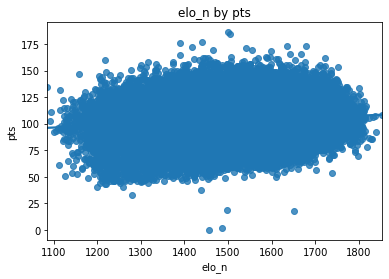

In [60]:
myPlotData = sns.regplot(x='elo_n', y='pts', data=df_v)
myPlotData.set(xlabel="elo_n", ylabel="pts", title="elo_n by pts")

In [61]:
df_v.loc[(df_v.elo_n>1450) & (df_v.pts<25)]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,game_result_verification,game_result_verification_result
3190,1596,195011220LAL,NBA,0,1951,11/22/1950,10,0,MNL,Lakers,18,"1,659.49","1,650.96",56.18,FTW,Pistons,19,"1,487.95","1,496.49",H,L,0.83,NaN,L,Verified
3191,1596,195011220LAL,NBA,1,1951,11/22/1950,12,0,FTW,Pistons,19,"1,487.95","1,496.49",40.74,MNL,Lakers,18,"1,659.49","1,650.96",A,W,0.17,NaN,W,Verified
26684,13343,197210260VIR,ABA,1,1973,10/26/1972,7,0,DNR,Nuggets,0,"1,460.34","1,457.45",40.41,VIR,Squires,2,"1,484.19","1,487.08",A,L,0.33,at Richmond VA; forfeit to VIR,L,Verified
26685,13343,197210260VIR,ABA,0,1973,10/26/1972,8,0,VIR,Squires,2,"1,484.19","1,487.08",43.51,DNR,Nuggets,0,"1,460.34","1,457.45",H,W,0.67,at Richmond VA; forfeit to VIR,W,Verified


In [62]:
df_v.loc[(df_v.elo_n>1450) & (df_v.pts>175)]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,game_result_verification,game_result_verification_result
50094,25048,198312130DEN,NBA,0,1984,12/13/1983,23,0,DEN,Nuggets,184,"1,512.70","1,505.56",41.49,DET,Pistons,186,"1,491.89","1,499.02",H,L,0.67,NaN,L,Verified
50095,25048,198312130DEN,NBA,1,1984,12/13/1983,23,0,DET,Pistons,186,"1,491.89","1,499.02",40.80,DEN,Nuggets,184,"1,512.70","1,505.56",A,W,0.33,NaN,W,Verified


In [63]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqline
import scipy.stats as scistat

In [65]:
df = pd.read_csv('NBA_Dataset_A4.csv')

In [66]:
def getlm(df_v):
    Y = df_v.pts
    X = df_v[['elo_i', 'elo_n']]
    X = sm.add_constant(X)
    return sm.OLS(Y, X).fit()

In [67]:
lm = getlm(df_v)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pts   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     9976.
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        12:26:31   Log-Likelihood:            -5.1039e+05
No. Observations:              126298   AIC:                         1.021e+06
Df Residuals:                  126295   BIC:                         1.021e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.0568      0.518    162.267      0.000      83.041      85.072
elo_i         -0.5191      0.004   -133.376      0.000      -0.527      -0.512
elo_n          0.5316      0.004    136.977      0.000       0.524       0.539
==============================================================================
Omnibus:                      504.543   Durbin-Watson:                   0.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              698.350
Skew:                          -0.003   Prob(JB):                    2.27e-152
Kurtosis:                       3.364   Cond. No.                     2.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
#5. Run the KNN model and generate anomaly scores in order to find potential outliers. Focus on columns 'win_equiv' and 'elo_i'. Feel free to use any other columns you find helpful. Show the predictions from the model.

In [69]:
from pyod.models.knn import KNN

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
standardizer = StandardScaler()

In [72]:
analysisvars = ['win_equiv', 'elo_i']

In [73]:
df_v = df_v.loc[:, analysisvars].dropna()

In [74]:
df_vSTD = standardizer.fit_transform(df_v.iloc[:, 1:])

In [75]:
df_vSTD

array([[-1.74107697],
       [-1.74107697],
       [-1.68112133],
       ...,
       [ 2.80670864],
       [ 1.83255088],
       [ 2.83930957]])

In [76]:
clf_name = 'KNN'
clf= KNN(contamination=0.1)
clf.fit(df_vSTD)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [77]:
y_pred = clf.labels_
y_scores = clf.decision_scores_

In [78]:
y_pred

array([0, 0, 1, ..., 1, 0, 1])

In [79]:
y_scores

array([0.        , 0.        , 0.00018727, ..., 0.00855821, 0.00015962,
       0.0194671 ])

In [80]:
predictions = pd.DataFrame(zip(y_pred, y_scores), columns=['outlier', 'scores'], index=df_v.index)

In [81]:
predictions.sample(10)

,outlier,scores
110862,0,0.00
117776,0,0.00
114662,0,0.00
76685,0,0.00
113602,0,0.00
112346,0,0.00
48012,0,0.00
35430,0,0.00
117192,0,0.00
12429,0,0.00


In [82]:
predictions.outlier.value_counts()

0    113678
1     12618
Name: outlier, dtype: int64

In [83]:
predictions.groupby(['outlier'])[['scores']].agg(['min', 'median', 'max'])

scores            
           min median  max
outlier                   
0         0.00   0.00 0.00
1         0.00   0.00 0.24